In [30]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
#profile = crimes.profile_report(title='Boston Crimes Profiling')
#profile.to_file(output_file='boston-crimes-profiling.html')
crimes = pd.read_csv('crime.csv')

In [2]:
crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808.0,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347.0,NaN,2018-08-21 0:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151.0,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272.0,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421.0,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285.0,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520.0,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520.0,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569.0,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [7]:
#profile = crimes.profile_report(title='Boston Crimes Profiling')
#profile.to_file(output_file='boston-crimes-profiling.html')


Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

/Users/ashleyshell/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
crimes.OCCURRED_ON_DATE = pd.to_datetime(crimes.OCCURRED_ON_DATE)

In [25]:
crimes.dtypes

INCIDENT_NUMBER                object
OFFENSE_CODE                    int64
OFFENSE_CODE_GROUP             object
OFFENSE_DESCRIPTION            object
DISTRICT                       object
REPORTING_AREA                float64
SHOOTING                       object
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                    object
HOUR                            int64
UCR_PART                       object
STREET                         object
Lat                           float64
Long                          float64
Location                       object
dtype: object

In [26]:
count = crimes.groupby('OFFENSE_CODE_GROUP').OFFENSE_CODE_GROUP.count()
count.sort_values()

OFFENSE_CODE_GROUP
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Biological Threat                                2
INVESTIGATE PERSON                               4
HUMAN TRAFFICKING                                7
                                             ...  
Other                                        18075
Investigate Person                           18750
Medical Assistance                           23540
Larceny                                      25935
Motor Vehicle Accident Response              37132
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

In [43]:
shooting = crimes.groupby('SHOOTING').SHOOTING.count()
extra = count.sort_values()
percent = extra / 100

OFFENSE_CODE_GROUP
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE      0.02
Burglary - No Property Taken                   0.02
Biological Threat                              0.02
INVESTIGATE PERSON                             0.04
HUMAN TRAFFICKING                              0.07
                                              ...  
Other                                        180.75
Investigate Person                           187.50
Medical Assistance                           235.40
Larceny                                      259.35
Motor Vehicle Accident Response              371.32
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: float64

In [ ]:
change NAN in shooting to False

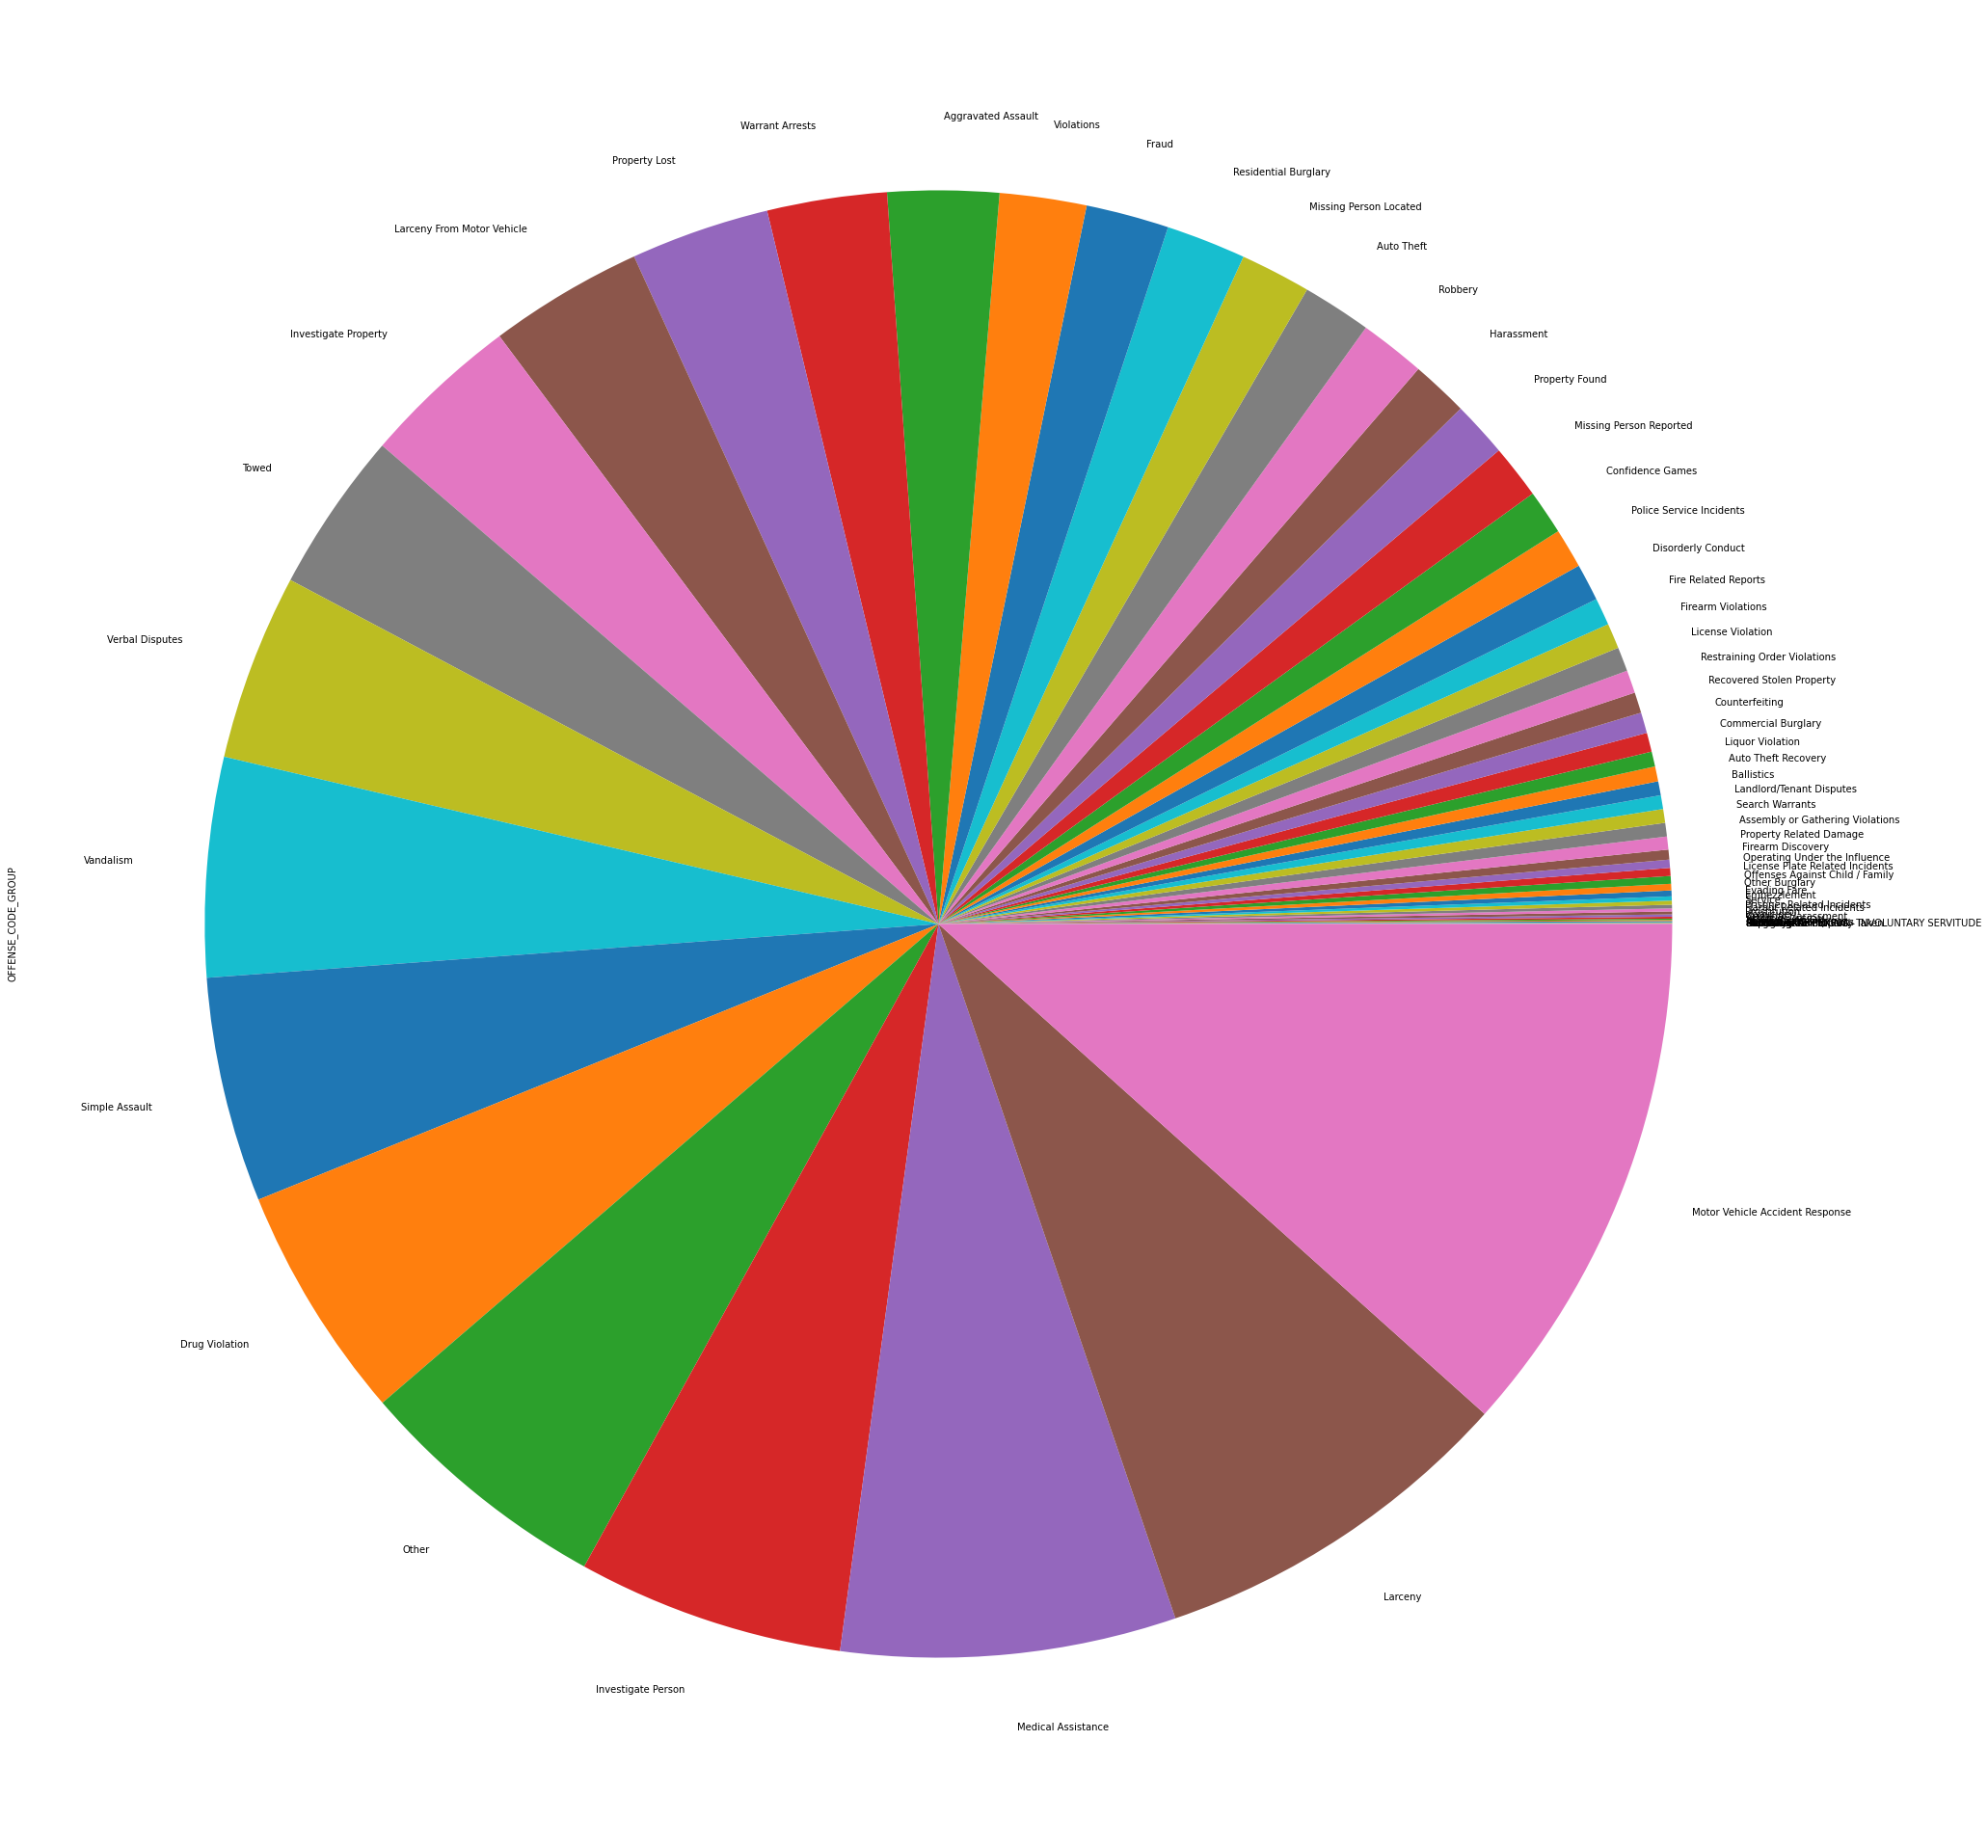

In [52]:
plot = extra.plot.pie(y='percent', figsize=(35, 35))

In [33]:

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

In [86]:
shootingother = crimes.loc[crimes.OFFENSE_CODE == 111]
shootingother

#newshooting = crimes.groupby('shootingother').shootingother.count()

#extramore = count.sort_values()
#percents = extramore / 100

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312.0,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
5689,I182064699,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,466.0,Y,2018-08-14 9:30:00,2018,8,Tuesday,9,Part One,DEERING RD,42.284140,-71.093051,"(42.28414025, -71.09305138)"
6278,I182064056,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,410.0,Y,2018-08-11 23:14:00,2018,8,Saturday,23,Part One,MANCHESTER ST,42.274040,-71.076301,"(42.27404039, -71.07630093)"
10813,I182059055,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,908.0,NaN,2018-07-26 18:14:00,2018,7,Thursday,18,Part One,SHANDON RD,42.295054,-71.089041,"(42.29505434, -71.08904077)"
11021,I182058835,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,435.0,Y,2018-07-25 22:57:00,2018,7,Wednesday,22,Part One,NORFOLK ST,42.288048,-71.077667,"(42.28804798, -71.07766654)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312521,I152056746,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E13,639.0,NaN,2015-07-02 16:30:00,2015,7,Thursday,16,Part One,ROBINWOOD AVE,42.316240,-71.112670,"(42.31624019, -71.11267011)"
312945,I152056250,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",A1,112.0,NaN,2015-07-08 12:15:00,2015,7,Wednesday,12,Part One,CHAUNCY ST,42.352517,-71.061129,"(42.35251737, -71.06112927)"
313764,I152055311,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,322.0,Y,2015-07-04 22:47:00,2015,7,Saturday,22,Part One,GLENBURNE ST,42.315122,-71.082520,"(42.31512218, -71.08252020)"
314239,I152054787,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,281.0,Y,2015-07-02 23:08:00,2015,7,Thursday,23,Part One,GREENVILLE ST,42.326968,-71.080519,"(42.32696802, -71.08051941)"
